# A Complete Guide For Decision Trees and Random Forest Models with Home Dataset 🏠
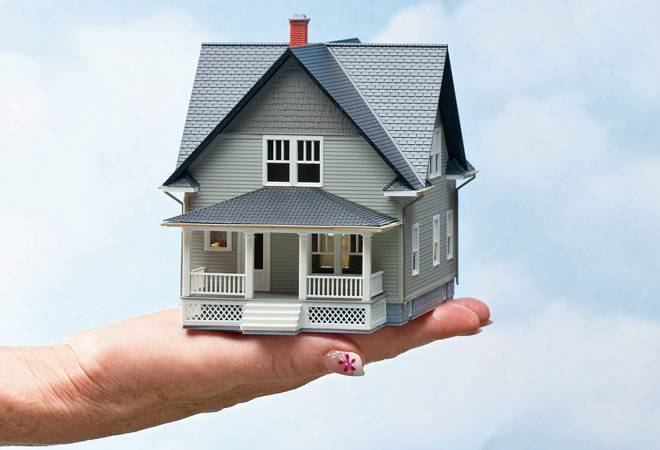

# 1. Introduction ⬇
**This notebook is our attempt to build various Decision trees and Random forest models and to find the best model out among them.**

**Please Dont forget to UpVote this notebook if you like this, so that it will motivate me to do more such notebooks**


# Now, Lets dive into this Notebook. 😃

# 2. Importing required libraries 📚

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 3. Reading Train CSV Data to build models 📝

In [ ]:
df = pd.read_csv('../input/home-data-for-ml-course/train.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.shape

# 4. Importing models and other required libraries 📚

In [ ]:
# Importing Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

# Importing Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Importing train_test_split to split our data
from sklearn.model_selection import train_test_split

# Importing mean_absolute_error to find Mean absolute error of each model
from sklearn.metrics import mean_absolute_error

# 5. Building models 🤖
**Our aim is to find the best model to predict the SalePrice (Target Variable) from the values of features like LotArea, YearBuilt, 1stFlrSF, 2ndFlrSF, FullBath, BedroomAbvGr, TotRmsAbvGrd.**

In [ ]:
# Create target object and call it y
y = df['SalePrice']

# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = df[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# 5.1. Decision Tree Model 🌳

In [ ]:
# Specify Model
decision_tree_model = DecisionTreeRegressor(random_state=1)

# Fit Model
decision_tree_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = decision_tree_model.predict(val_X)
val_mae_1 = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae_1))

# 5.2. Decision Tree Model with max_leaf_nodes specified 🌳

In [ ]:
# Function to return Mean absolute error
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [ ]:
# Function to return best tree size (Best max_leaf_nodes value)
def get_best_tree_size():
    candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
    mae_array = []
    
    # Write loop to find the ideal tree size from candidate_max_leaf_nodes
    for x in candidate_max_leaf_nodes:
        mae = get_mae(x, train_X, val_X, train_y, val_y)
        mae_array.append(mae)
        
    # Find minimum MAE and return best tree size
    min_mae = min(mae_array)
    min_mae_index = mae_array.index(min_mae)
    return candidate_max_leaf_nodes[min_mae_index]

In [ ]:
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = get_best_tree_size()

# Specify Model
decision_tree_with_max_leaf_nodes_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)

# Fit Model
decision_tree_with_max_leaf_nodes_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = decision_tree_with_max_leaf_nodes_model.predict(val_X)
val_mae_2 = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when specifying max_leaf_nodes: {:,.0f}".format(val_mae_2))

# 5.3. Random Forest Model 🌲🌳🌲

In [ ]:
# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(train_X, train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

# 6. Comparing MAE values of all models 📊

In [ ]:
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae_1))
print("Validation MAE when specifying max_leaf_nodes: {:,.0f}".format(val_mae_2))
print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

# 7. Building the best final model 🤖
**By comparing the MAE values of all models, it is clear that Random forest is the best model among all. So we choose Random forest approach to create our final model.**

In [ ]:
# Create target object and call it y
y = df['SalePrice']

# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = df[features]

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(X, y)

# 8. Reading Test CSV Data to Predict values 📝

In [ ]:
df_test = pd.read_csv('../input/home-data-for-ml-course/test.csv')
df_test.head()

# 9. Predict using our final model 📊

In [ ]:
# Create val_X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
val_X = df_test[features]

# Predict SalePrice with Random Forest model
rf_val_predictions = rf_model.predict(val_X)

# Create output dataframe
output = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': rf_val_predictions})
output.to_csv('submission.csv', index=False)
output

# 10. Conclusion
**Finally we found the best model with least MAE value, build the final model and predicted the SalePrice values with our final model.**

**Please Dont forget to UpVote this notebook if you like this, so that it will motivate me to do more such notebooks**


# **Thank You 😃**